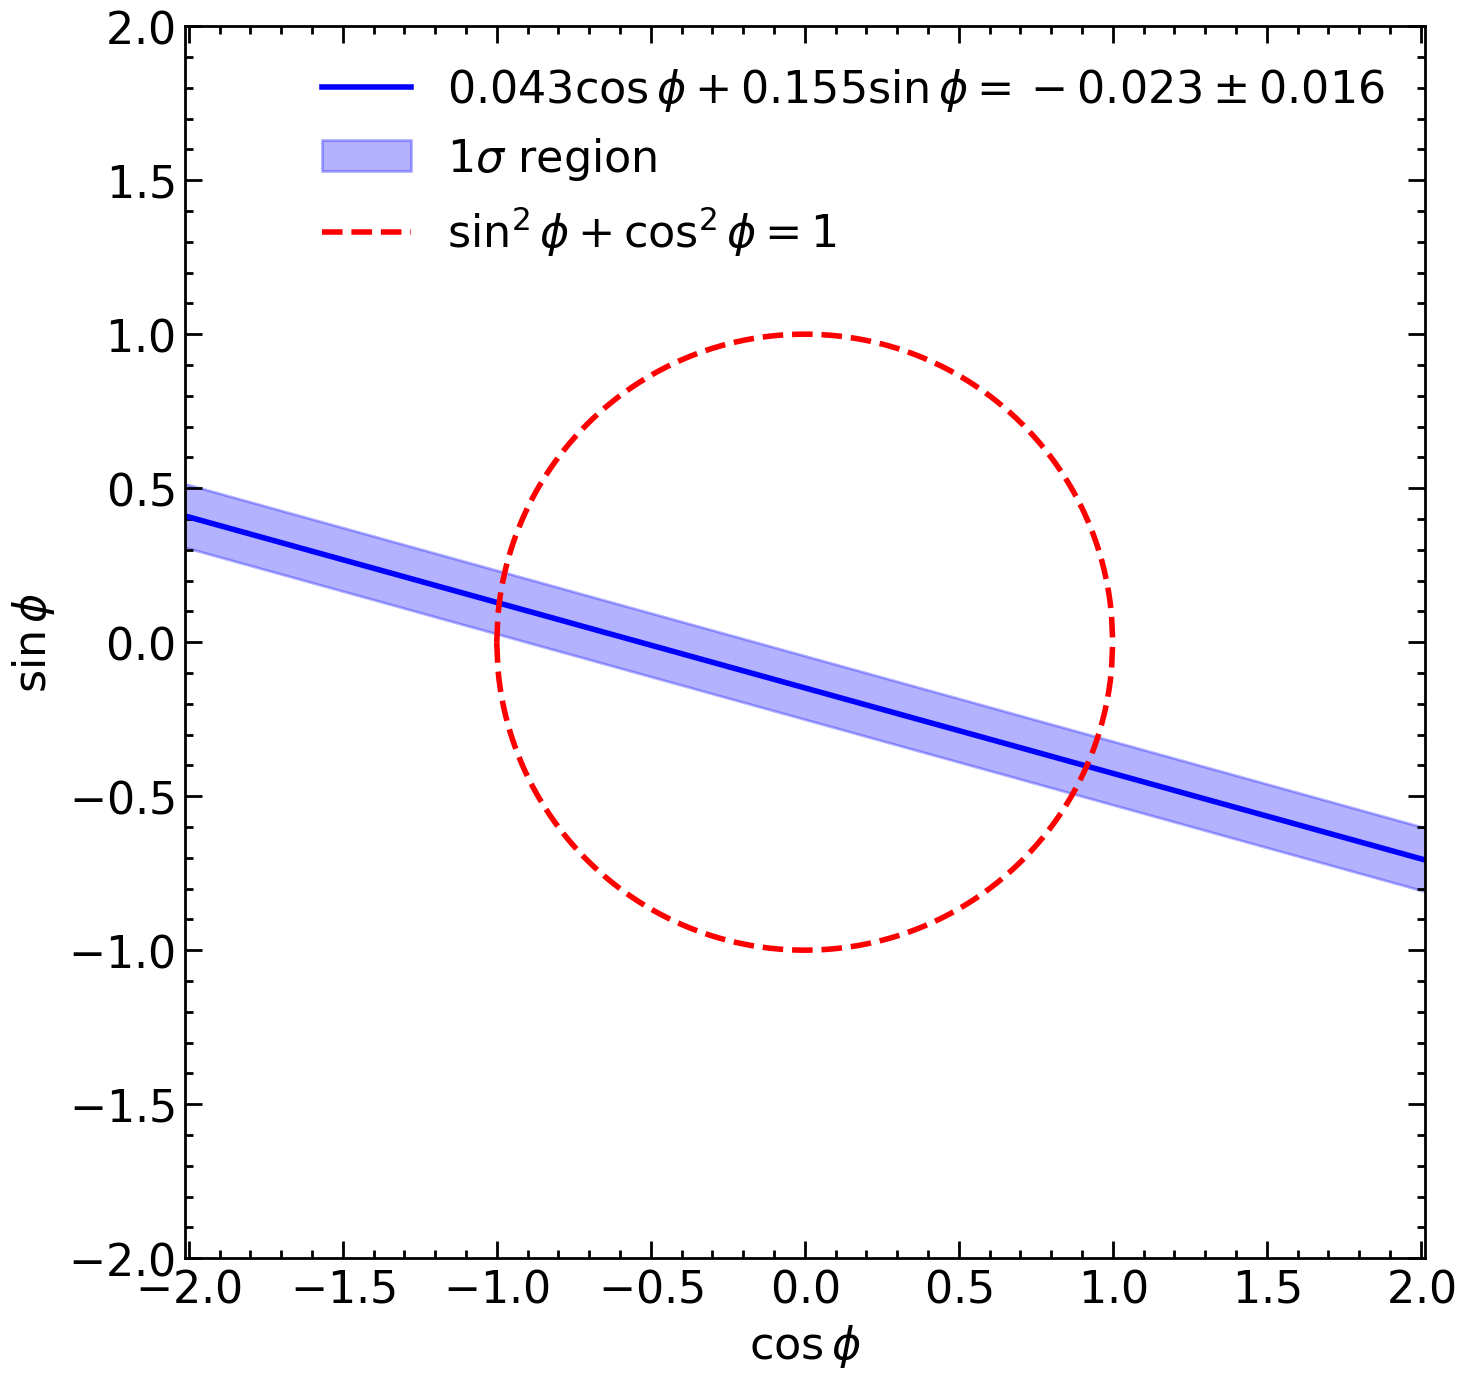

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scienceplots
plt.style.use(['science', 'notebook'])

%config InlineBackend.figure_format = 'retina'

# Define constants for the equation
a = 0.043
b = 0.155

# a = 0.043
# b = 0.3

# c = 0.2178
# sigma = 0.07767
# c = 0.1691
# sigma = 0.07865
# c = -0.063
# sigma = 0.043

# c = -0.1
# sigma = 0.02977



c = -0.023
sigma = 0.016
# c = -0.01946
# sigma = 0.01397




# Generate an array for cos(x) values for the circle equation
circle_cos = np.linspace(-1, 1, 500)
# Calculate the corresponding sin(x) values based on the circle equation sin^2 + cos^2 = 1
circle_sin = np.sqrt(1 - circle_cos**2)

# Generate an array for cos(x) values
cos_x = np.linspace(-4, 4, 1000)
# Calculate the corresponding sin(x) values based on the equations
sin_x_central = (c - a * cos_x) / b
sin_x_upper = (c + sigma - a * cos_x) / b
sin_x_lower = (c - sigma - a * cos_x) / b

# Update plot style for darker right and top spines
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['xtick.color'] = 'black'
mpl.rcParams['ytick.color'] = 'black'

# Create the plot
plt.figure(figsize=(8, 8))

# Plot the central line using the further extended range
plt.plot(cos_x, sin_x_central, label=f'${a} \\cos \\phi + {b} \\sin \\phi= {c} \\pm {sigma}$', color='blue')

# Plot the 1-sigma error region extended to the further extended range
plt.fill_between(cos_x, sin_x_lower, sin_x_upper, color='blue', alpha=0.3, label=f'$1\\sigma$ region')

# Plot the circle equation
plt.plot(circle_cos, circle_sin, linestyle='--', color='red', label='$\\sin^2 \\phi + \\cos^2 \\phi = 1$')
plt.plot(circle_cos, -circle_sin, linestyle='--', color='red')

# Set axis labels
plt.xlabel('$\\cos \\phi$')
plt.ylabel('$\\sin \\phi$')

# Extend and square the axes but limit the view to [-2, 2]
plt.axis('equal')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
# plt.xlim([-1.5, 1.5])
# plt.ylim([-1.5, 1.5])

# Add legend
plt.legend()

# Show the plot
plt.show()

# Reset plot style to default for future plots
mpl.rcParams.update(mpl.rcParamsDefault)


In [2]:
import numpy as np
from scipy.optimize import fsolve

# Intersection functions
def central_intersection(cos_phi):
    sin_phi = (c - a * cos_phi) / b
    return sin_phi**2 + cos_phi**2 - 1

def upper_intersection(cos_phi):
    sin_phi = (c + sigma - a * cos_phi) / b
    return sin_phi**2 + cos_phi**2 - 1

def lower_intersection(cos_phi):
    sin_phi = (c - sigma - a * cos_phi) / b
    return sin_phi**2 + cos_phi**2 - 1

# Solve for intersections
central_intersections_cos = fsolve(central_intersection, [-1, 1])
upper_intersections_cos = fsolve(upper_intersection, [-1, 1])
lower_intersections_cos = fsolve(lower_intersection, [-1, 1])

# Calculate corresponding sin(phi) values
central_intersections_sin = (c - a * central_intersections_cos) / b
upper_intersections_sin = (c + sigma - a * upper_intersections_cos) / b
lower_intersections_sin = (c - sigma - a * lower_intersections_cos) / b

# Calculate phi values
central_phi = np.arctan2(central_intersections_sin, central_intersections_cos)
upper_phi = np.arctan2(upper_intersections_sin, upper_intersections_cos)
lower_phi = np.arctan2(lower_intersections_sin, lower_intersections_cos)

# Ensure phi values are positive
central_phi_positive = [phi + 2 * np.pi if phi < 0 else phi for phi in central_phi]
upper_phi_positive = [phi + 2 * np.pi if phi < 0 else phi for phi in upper_phi]
lower_phi_positive = [phi + 2 * np.pi if phi < 0 else phi for phi in lower_phi]

# Convert radians to degrees for better readability
central_phi_degrees = np.degrees(central_phi_positive)
upper_phi_degrees = np.degrees(upper_phi_positive)
lower_phi_degrees = np.degrees(lower_phi_positive)

# Output results
intersections_phi = [
    ("Central 1", central_phi_degrees[0]),
    ("Upper 1σ 1", upper_phi_degrees[0]),
    ("Lower 1σ 1", lower_phi_degrees[0]),
    ("Central 2", central_phi_degrees[1]),
    ("Upper 1σ 2", upper_phi_degrees[1]),
    ("Lower 1σ 2", lower_phi_degrees[1])
]

for intersection in intersections_phi:
    print(f"{intersection[0]}: Φ = {intersection[1]:.2f}°")


Central 1: Φ = 172.72°
Upper 1σ 1: Φ = 166.99°
Lower 1σ 1: Φ = 178.53°
Central 2: Φ = 336.27°
Upper 1σ 2: Φ = 342.00°
Lower 1σ 2: Φ = 330.46°


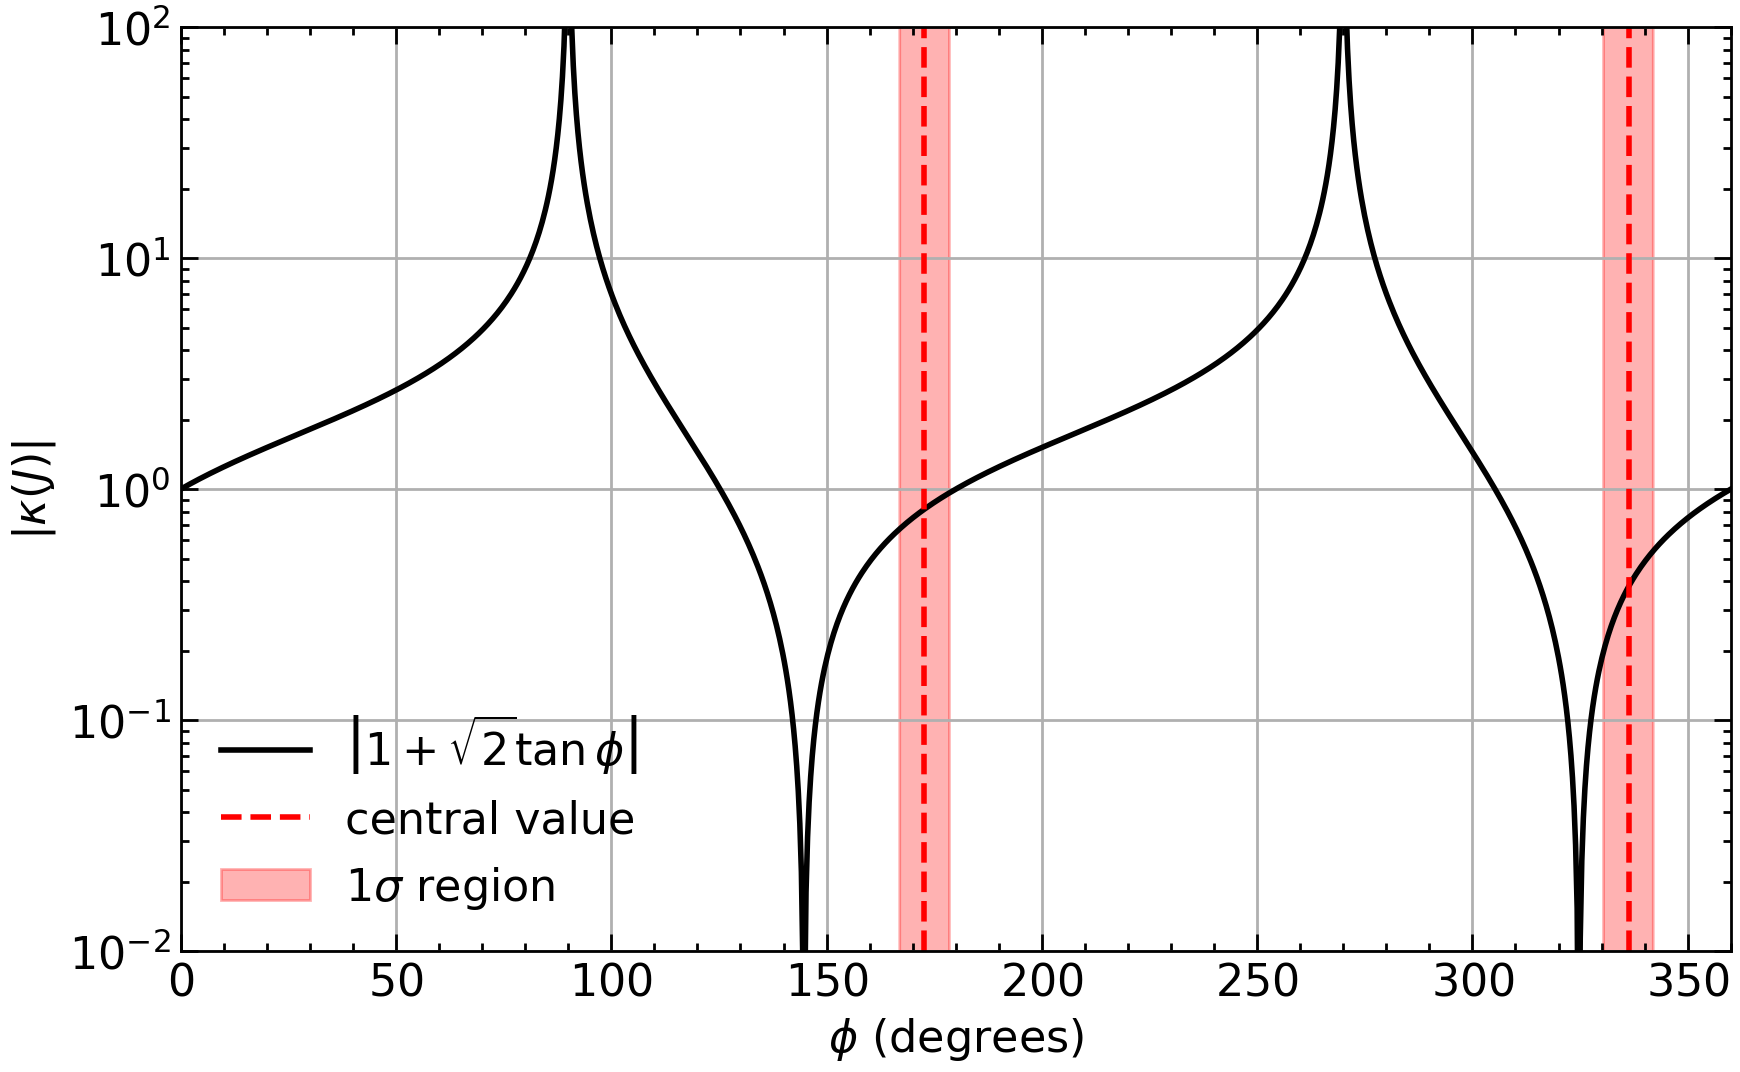

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
plt.style.use(['science', 'notebook'])

%config InlineBackend.figure_format = 'retina'

# Define the function and the range
x = np.linspace(0, 360, 1000)  # x values in degrees

y = np.abs(1 + np.sqrt(2) * np.tan(np.radians(x)))  # Convert degrees to radians for np.tan
y_shade = np.linspace(0.001,100,1000)

# Calculate the y-values at the points of vertical lines
y_at_45_089 = np.abs(1 + np.sqrt(2) * np.tan(np.radians(45.089)))
y_at_103_901 = np.abs(1 + np.sqrt(2) * np.tan(np.radians(103.901)))

# Plotting
plt.figure(figsize=(10, 6))
plt.semilogy(x, y, color='black', label='$\\left| 1 + \\sqrt{2} \\tan \\phi \\right|$')
plt.axvline(x=central_phi_degrees[0], color='red', linestyle='--', label=f'central value')
plt.axvline(x=central_phi_degrees[1], color='red', linestyle='--')

plt.fill_betweenx(y_shade, lower_phi_degrees[0], upper_phi_degrees[0], color='red', alpha=0.3, label=f'$1\\sigma$ region')
plt.fill_betweenx(y_shade, lower_phi_degrees[1], upper_phi_degrees[1], color='red', alpha=0.3)

# plt.fill_betweenx(y_shade, 45.089, 103.901, color='red', alpha=0.3, label=f'$1\\sigma$ region')

plt.xlabel(r'$\phi$ (degrees)')
plt.ylabel(r'$|\kappa(J)|$')
plt.xlim(0, 360)  # Limit x-axis to 0-360 degrees
plt.ylim(1e-2, 1e2)  # Limit y-axis from 10^-2 to 10^2
plt.grid(True)
plt.legend()
plt.show()

# # Print the y-values at the points of vertical lines
# print(f"At phi = 45.089, y = {y_at_45_089}")
# print(f"At phi = 103.901, y = {y_at_103_901}")
